## Why do this again?
There are some 'soil' samples on both MGnify and IMG that don't make sense for this work, such as permafrost, Oil-contaminated, etc. I will follow more or less the same methods used for the viral soil paper, that is annexed in notion (and slack with antonio)

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### IMG

In [33]:
df_img = pd.read_csv("IMG_soil_rhizo_full_metadata.csv", index_col=0)

df_img.head()

,Domain,Sequencing Status,Study Name,Genome Name / Sample Name,Sequencing Center,IMG Genome ID,Is Public,NCBI Assembly Accession,NCBI Bioproject Accession,NCBI Biosample Accession,...,Ecosystem Type,Specific Ecosystem,Geographic Location,Isolation Country,Latitude,Longitude,Genome Size * assembled,Gene Count * assembled,Unnamed: 23,Study_type
taxon_oid,,,,,,,,,,,,,,,,,,,,,
3300020080,*Microbiome,Permanent Draft,"Corn, switchgrass and miscanthus rhizosphere m...",Corn rhizosphere microbial communities from Ke...,DOE Joint Genome Institute (JGI),3300020080,Yes,NaN,PRJNA465143,SAMN09091661,...,Roots,Soil,USA: Michigan,USA,42.394800,-85.373800,874948499,1922239,NaN,metatranscriptomic
3300029276,*Microbiome,Permanent Draft,Effect of Agricultural Soil Managment Practice...,Sorghum rhizosphere microbial communities from...,QB3 Vincent J. Coates Genomics Sequencing Labo...,3300029276,Yes,NaN,NaN,NaN,...,Roots,Unclassified,"Five Points, CA, USA",NaN,36.339058,-120.120310,36116671,65313,NaN,metatranscriptomic
3300003159,*Microbiome,Permanent Draft,Avena fatua rhizosphere microbial communities ...,Avena fatua rhizosphere microbial communities ...,DOE Joint Genome Institute (JGI),3300003159,Yes,NaN,PRJNA366869,SAMN06268241,...,Roots,Soil,"Hopland, California, USA",USA,38.973640,-123.117453,4005913,7924,NaN,metatranscriptomic
3300002864,*Microbiome,Permanent Draft,Avena fatua rhizosphere microbial communities ...,Avena fatua rhizosphere microbial communities ...,DOE Joint Genome Institute (JGI),3300002864,Yes,NaN,PRJNA366862,SAMN06268234,...,Roots,Soil,"Hopland, California, USA",USA,38.973640,-123.117453,7047355,20414,NaN,metatranscriptomic
3300023438,*Microbiome,Finished,Effect of Agricultural Soil Managment Practice...,Sorghum rhizosphere microbial communities from...,QB3 Vincent J. Coates Genomics Sequencing Labo...,3300023438,Yes,NaN,NaN,NaN,...,Roots,Unclassified,"Five Points, CA, USA",USA,36.339059,-120.120310,37774483,65376,NaN,metatranscriptomic


### Viral paper oids

In [34]:
with open("soil_taxon_oids_PNNL.txt") as f:
    oids = [int(i.strip()) for i in f]

reindexed = df_img.reindex(oids)

for i in reindexed[
    ["Ecosystem Category", "Ecosystem Subtype", "Ecosystem Type", "Specific Ecosystem"]
]:
    print(i, reindexed[i].unique())

Ecosystem Category ['Terrestrial' 'Plants' nan]
Ecosystem Subtype ['Unclassified' 'Sand' 'Rhizosphere' 'Agricultural land'
 'Temperate forest' 'Loam' 'Tropical forest' 'Boreal forest/Taiga'
 'Grasslands' 'Wetlands' 'Clay' 'Rock core/Sediment' nan 'Glacier'
 'Surface mine' 'Floodplain' 'Soil crust' 'Desert' 'Tailings' 'Peat'
 'Paddy field/soil']
Ecosystem Type ['Soil' 'Roots' 'Deep subsurface' nan]
Specific Ecosystem ['Agricultural land' 'Unclassified' 'Grasslands' 'Permafrost' 'Desert'
 'Soil' 'Bulk soil' 'Tropical rainforest' 'Peat' nan 'Mineral soil'
 'Reclaimed' 'Physical' 'Biological' 'Bog' 'Farm']


They have permafrost, glacier and other stuff that we don't want. What I am going to do is do all my filtering, and then get the privates from this list

In [35]:
missing_oids = reindexed[pd.isnull(reindexed).all(axis=1)]
missing_oids.index

Index([3300009971, 3300009972, 3300009973, 3300009975, 3300009976, 3300009977,
       3300009980, 3300009981, 3300009989, 3300009990,
       ...
       3300040708, 3300040709, 3300040710, 3300040711, 3300040712, 3300040714,
       3300040716, 3300040718, 3300041965, 3300041966],
      dtype='int64', name='taxon_oid', length=629)

In [36]:
with open("IMG_viral_paper_missing_oids.txt", "w") as f:
    for i in missing_oids.index:
        f.write(str(i))
        f.write("\n")

These 629 oids are missing from my data, possibly because they are private (or maybe some kind of filtering difference). I managed to get access to all private metadata in IMG, and put it in a table

In [37]:
# all private metadata. From this I only got the PNNL oids

df_img_private = pd.read_csv(
    "../helper_data/IMG_all_terrestrial_and_plant_metadata/IMG_all_environmental_private_metadata.tsv",
    sep="\t",
    index_col=0,
)
df_img_private.head()

/tmp/ipykernel_719585/237599524.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df_img_private = pd.read_csv('../IMG_all_terrestrial_and_plant_metadata/IMG_all_environmental_private_metadata.tsv', sep='\t', index_col=0)


,Domain,Sequencing Status,Study Name,Genome Name / Sample Name,Sequencing Center,IMG Genome ID,Is Public,NCBI Assembly Accession,NCBI Bioproject Accession,NCBI Biosample Accession,...,Ecosystem Subtype,Ecosystem Type,Specific Ecosystem,Geographic Location,Isolation Country,Latitude,Longitude,Genome Size * assembled,Gene Count * assembled,Unnamed: 23
taxon_oid,,,,,,,,,,,,,,,,,,,,,
3300047099,*Microbiome,Permanent Draft,"Pot soil microbial communities from Wonju, Sou...","Pot soil microbial communities from Wonju, Sou...",Macrogen Inc,3300047099,No,NaN,NaN,NaN,...,Potting soil,Soil,Unclassified,South Korea: Wonju,South Korea,37.277123,127.903091,1344106560,2165126,NaN
3300059897,*Microbiome,Permanent Draft,SIP Metagenome Study - Biomass microbial commu...,Anaerobic digester fluid SIP fraction microbia...,DOE Joint Genome Institute (JGI),3300059897,No,NaN,NaN,NaN,...,Unclassified,Anaerobic,Unclassified,"Canada: Vancouver, BC",Canada,49.263236,-123.248945,139431448,276775,NaN
3300064310,*Microbiome,Complete,Forest soil microbial communities from various...,Forest soil microbial communities from Santa R...,DOE Joint Genome Institute (JGI),3300064310,No,NaN,NaN,NaN,...,Temperate forest,Soil,Unclassified,"USA: Santa Rosa Plateau, California",USA,33.535850,-117.255268,926009419,1697190,NaN
3300053248,*Microbiome,Permanent Draft,Sediment chemolithoautotrophic microbial commu...,Sorted cell/s from microbial mat in river back...,DOE Joint Genome Institute (JGI),3300053248,No,NaN,NaN,NaN,...,River,Freshwater,Microbial mats,USA: Alaska,USA,68.672162,-149.135910,686424,765,NaN
3300055996,*Microbiome,Permanent Draft,Human fecal microbial communities from Peking ...,Human fecal microbial communities from Peking ...,Beijing Genomics Institute (BGI),3300055996,No,NaN,PRJNA422434,SAMN00715189,...,Large intestine,Digestive system,Fecal,China: Peking University Shenzhen Hospital,China,22.555927,114.047156,57708004,131744,NaN


In [38]:
temp = df_img_private.reindex(missing_oids.index)

# which are not in the private table?
temp[pd.isnull(temp).all(axis=1)].index

Index([3300009971, 3300009972, 3300009973, 3300009975, 3300009976, 3300009977,
       3300009980, 3300009981, 3300009989, 3300009990, 3300009992, 3300009994,
       3300009995, 3300027998, 3300027999, 3300028000, 3300028005, 3300028059,
       3300029802, 3300029804],
      dtype='int64', name='taxon_oid')

I manually checked these 20 oids, and rejected them all. The rest can be included at the end of the IMG table

### Filtering the public table
The viral paper criteria were:

(1) GOLD ecosystem types: Rock-dwelling, Deep subsurface, Plant litter, Geologic, Oil reservoir, Volcanic, and Contaminated

(2) GOLD ecosystem subtypes: Wetlands, Aquifer, Tar, Sediment, Fracking Water, and Soil crust

(4) words in title: wetland, sediment, acid mine, cave wall surface, mine tailings, rock biofilm, beach sand, Petroleum, Stalagmite, Subsurface hydrocarbon microbial communities, Vadose zone, mud volcano, Fumarolic, enriched, Composted filter cake, Ice psychrophilic, oil sands, groundwater, Contaminated, rock biofilm, Deep mine, coal mine fire, Hydrocarbon resource environments, Marine, enrichment, groundwater, mangrove, saline desert, Hydroxyproline, Rifle, coastal, compost, biocrust, crust, Creosote, soil warming, Testing DNA extraction, and/or Agave;

(5) GOLD geographic location of wetland

(6) GOLD project type of Metagenome - Cell Enrichment. Additionally, sample names that indicated experimental manipulation (e.g., CO2 enrichment or nitrogen fertilization) or were located in permafrost layers were manually excluded

In [39]:
for i in df_img[
    ["Ecosystem Category", "Ecosystem Subtype", "Ecosystem Type", "Specific Ecosystem"]
]:
    print(i, sorted(df_img[i].unique()))

Ecosystem Category ['Arthropoda, Terrestrial', 'Plants', 'Terrestrial']
Ecosystem Subtype ['Agricultural land', 'Agricultural land, Unclassified', 'Biochar', 'Biocrust', 'Boreal forest/Taiga', 'Botanical garden', 'Clay', 'Coastal area', 'Contaminated', 'Desert', 'Endosphere', 'Floodplain', 'Fossil', 'Garden', 'Glacial till', 'Glacier', 'Grasslands', 'Greenhouse', 'Insects nest', 'Loam', 'Oak savanna', 'Orchard', 'Organic layer', 'Paddy field/soil', 'Palsa', 'Pasture', 'Peat', 'Peat, Wetlands', 'Phylloplane/Leaf', 'Ranch', 'Rhizoplane', 'Rhizosphere', 'Riparian zone', 'Rock core/Sediment', 'Sand', 'Sediment', 'Shrubland', 'Silt', 'Soil crust', 'Sub-biocrust', 'Surface mine', 'Tailings', 'Temperate forest', 'Tree plantation', 'Tropical forest', 'Tundra', 'Unclassified', 'Vadose zone', 'Watershed', 'Wetlands']
Ecosystem Type ['Ant dump, Nest', 'Deep subsurface', 'Geologic', 'Nest', 'Peat moss', 'Phyllosphere', 'Plant litter', 'Rock-dwelling (endoliths)', 'Roots', 'Soil', 'Unclassified']
S

In [40]:
for i in temp[
    ["Ecosystem Category", "Ecosystem Subtype", "Ecosystem Type", "Specific Ecosystem"]
]:
    print(i, temp[i].unique())

Ecosystem Category [nan 'Terrestrial' 'Aquatic']
Ecosystem Subtype [nan 'Unclassified' 'Boreal forest/Taiga' 'Temperate forest'
 'Intertidal zone' 'Sand' 'Glacier' 'Tropical forest']
Ecosystem Type [nan 'Soil' 'Marine' 'Volcanic']
Specific Ecosystem [nan 'Unclassified' 'Permafrost' 'Grasslands' 'Bulk soil' 'Salt marsh'
 'Agricultural land' 'Tropical rainforest' 'Desert' 'Shrubland']


In [41]:
# my own exclusion terms start after Agave (Glacier)
exclusion_terms = "Rock-dwelling|Deep subsurface|Plant litter|Geologic|Oil reservoir|Volcanic|Contaminated|Wetlands|Aquifer|Tar|Sediment|Fracking Water|Soil crust|wetland|sediment|acid mine|cave wall surface|mine tailings|rock biofilm|beach sand|Petroleum|Stalagmite|Subsurface hydrocarbon microbial communities|Vadose zone|mud volcano|Fumarolic|enriched|Composted filter cake|Ice psychrophilic|oil sands|groundwater|Contaminated|rock biofilm|Deep mine|coal mine fire|Hydrocarbon resource environments|Marine|enrichment|groundwater|mangrove|saline desert|Hydroxyproline|Rifle|coastal|compost|biocrust|crust|Creosote|soil warming|Testing DNA extraction|Agave|Glacier|permafrost|oil reservoir|winter snow cover|seasonal snow patch|Interdital zone|Aquatic|Arthropoda|Phyllosphere|Nest|Phylloplane|Phyllosphere|Endosphere|Fossil|Rhizoplane"

Join the private metadata

In [42]:
df_img = pd.concat([df_img, temp[~pd.isnull(temp).all(axis=1)]])

In [43]:
# Exclusions from paper + Glacier stuff (not including Glacial till)

df_img = df_img[
    (~df_img["Ecosystem Type"].str.contains(exclusion_terms, case=False, na=False))
    & (
        ~df_img["Ecosystem Category"].str.contains(
            exclusion_terms, case=False, na=False
        )
    )
    & (~df_img["Ecosystem Subtype"].str.contains(exclusion_terms, case=False, na=False))
    & (
        ~df_img["Specific Ecosystem"].str.contains(
            exclusion_terms, case=False, na=False
        )
    )
    & (
        ~df_img["Geographic Location"].str.contains(
            exclusion_terms, case=False, na=False
        )
    )
    & (~df_img["Study Name"].str.contains(exclusion_terms, case=False))
]

In [44]:
for i in df_img[
    ["Ecosystem Category", "Ecosystem Subtype", "Ecosystem Type", "Specific Ecosystem"]
]:
    print(i, sorted(df_img[i].unique()))

Ecosystem Category ['Plants', 'Terrestrial']
Ecosystem Subtype ['Agricultural land', 'Agricultural land, Unclassified', 'Biochar', 'Boreal forest/Taiga', 'Botanical garden', 'Clay', 'Desert', 'Floodplain', 'Garden', 'Grasslands', 'Greenhouse', 'Loam', 'Oak savanna', 'Orchard', 'Paddy field/soil', 'Palsa', 'Pasture', 'Peat', 'Ranch', 'Rhizosphere', 'Riparian zone', 'Sand', 'Shrubland', 'Silt', 'Surface mine', 'Tailings', 'Temperate forest', 'Tree plantation', 'Tropical forest', 'Tundra', 'Unclassified', 'Watershed']
Ecosystem Type ['Roots', 'Soil', 'Unclassified']
Specific Ecosystem ['Agricultural land', 'Bog', 'Bulk soil', 'Desert', 'Farm', 'Fen', 'Forest soil', 'Grasslands', 'Mineral soil', 'Mineral soil core', 'Mire', 'O horizon/Organic', 'Orchard soil', 'Reclaimed', 'Riparian soil', 'Shrubland', 'Soil', 'Trees stand', 'Tropical rainforest', 'Truffle orchard', 'Unclassified']


Check if I didn't get any off-limits private data

In [45]:
for i in df_img[df_img["Is Public"] == "No"].index:
    if i not in oids:
        print(i)

In [46]:
df_img.to_csv("IMG_soil_final_metadata.csv")

/clusterfs/jgi/groups/science/homes/mbfiamenghi/.micromamba/envs/data_science/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/clusterfs/jgi/groups/science/homes/mbfiamenghi/.micromamba/envs/data_science/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/clusterfs/jgi/groups/science/homes/mbfiamenghi/.micromamba/envs/data_science/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/clusterfs/jgi/groups/science/homes/mbfi

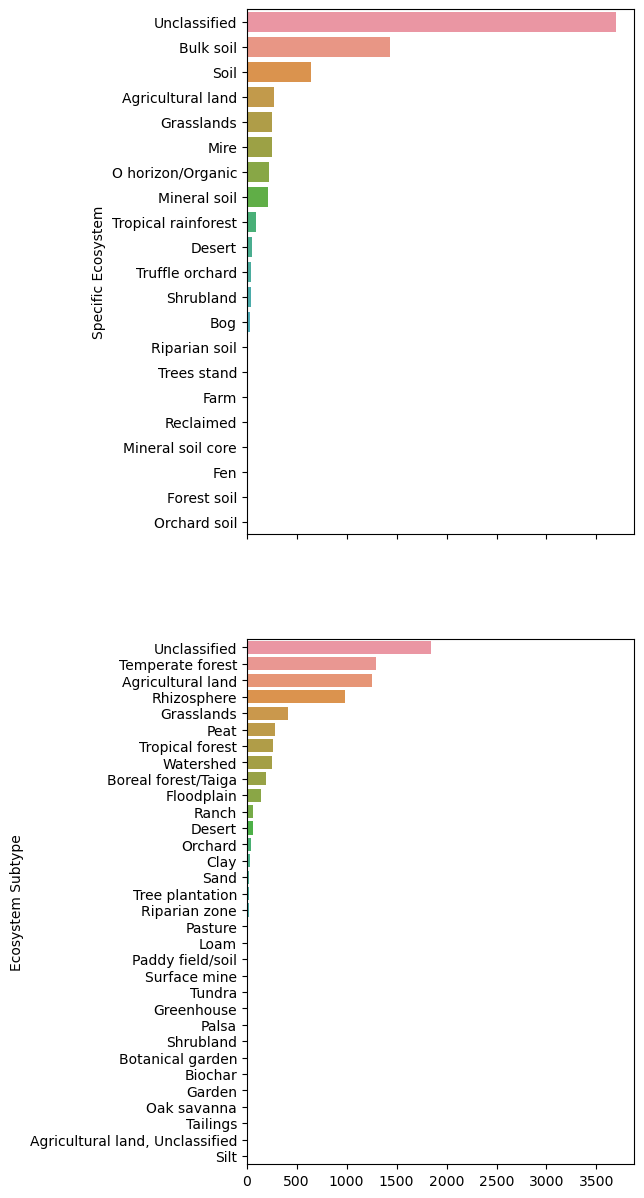

In [47]:
fig, axes = plt.subplots(figsize=(5, 15), nrows=2, sharex=True)

sns.barplot(
    y=df_img["Specific Ecosystem"].value_counts().index,
    x=df_img["Specific Ecosystem"].value_counts().values,
    ax=axes[0],
)
sns.barplot(
    y=df_img["Ecosystem Subtype"].value_counts().index,
    x=df_img["Ecosystem Subtype"].value_counts().values,
    ax=axes[1],
);

### MGnify

In [48]:
df_mgnify = pd.read_csv("MGnify_soil_rhizo_full_metadata.csv")

df_mgnify.head()

,type_analyses,id_analyses,attributes.accession_analyses,attributes.analysis-status,attributes.analysis-summary,attributes.experiment-type,attributes.pipeline-version,attributes.is-private,attributes.complete-time,attributes.instrument-platform,...,attributes.sample-desc,attributes.environment-biome,attributes.environment-feature,attributes.environment-material,attributes.sample-name,attributes.sample-alias,attributes.last-update,relationships.studies.data,relationships.biome.data.id,relationships.biome.data.type
0,analysis-jobs,MGYA00000240,MGYA00000240,completed,"[{'key': 'Submitted nucleotide sequences', 'va...",metagenomic,1.0,False,2011-03-04T00:00:00,LS454,...,Soil metagenome extracted from rainforest soil...,Tropical and subtropical moist broadleaf fores...,forest soil,soil,Puerto Rico Rainforest soil metagenome,Puerto_Rico_Rainforest_soil_metagenome,2015-08-13T15:30:55,"[{'id': 'MGYS00000256', 'type': 'studies'}]",root:Environmental:Terrestrial:Soil:Tropical r...,biomes
1,analysis-jobs,MGYA00000261,MGYA00000261,completed,"[{'key': 'Submitted nucleotide sequences', 'va...",metatranscriptomic,1.0,False,2011-03-04T00:00:00,LS454,...,The roots of 4 week old wheat plants were loos...,terrestrial biome,rhizosphere,soil,Wheat Rhizosphere soil from John Innes Centre,Wheat-MID3-MID6 rhizosphere mRNA enriched,2015-08-13T15:30:56,"[{'id': 'MGYS00000260', 'type': 'studies'}]",root:Environmental:Terrestrial:Soil,biomes
2,analysis-jobs,MGYA00002252,MGYA00002252,completed,"[{'key': 'Submitted nucleotide sequences', 'va...",metagenomic,1.0,False,2013-09-03T00:00:00,LS454,...,F1; Direct MP Bio1O1,terrestrial biome,grassland,soil,F1; Direct MP Bio1O1,F1,2015-08-13T15:31:00,"[{'id': 'MGYS00000283', 'type': 'studies'}]",root:Environmental:Terrestrial:Soil:Grasslands,biomes
3,analysis-jobs,MGYA00002253,MGYA00002253,completed,"[{'key': 'Submitted nucleotide sequences', 'va...",metagenomic,1.0,False,2013-09-03T00:00:00,LS454,...,F2a; Indirect MP Bio1O1,terrestrial biome,grassland,soil,F2a; Indirect MP Bio1O1,F2a,2015-08-13T15:31:00,"[{'id': 'MGYS00000283', 'type': 'studies'}]",root:Environmental:Terrestrial:Soil:Grasslands,biomes
4,analysis-jobs,MGYA00002254,MGYA00002254,completed,"[{'key': 'Submitted nucleotide sequences', 'va...",metagenomic,1.0,False,2013-09-03T00:00:00,LS454,...,F2b; Indirect MP Bio1O1,terrestrial biome,grassland,soil,F2b; Indirect MP Bio1O1,F2b,2015-08-13T15:31:00,"[{'id': 'MGYS00000283', 'type': 'studies'}]",root:Environmental:Terrestrial:Soil:Grasslands,biomes


In [49]:
for i in df_mgnify[
    [
        "attributes.environment-biome",
        "attributes.environment-feature",
        "attributes.environment-material",
    ]
]:
    print(i, df_mgnify[i].unique())

attributes.environment-biome ['Tropical and subtropical moist broadleaf forest biome'
 'terrestrial biome' 'tropical rainforest'
 'temperate grassland biome ENVO:01000193' 'forest biome' 'park land'
 'meadow' 'grassland' 'Grassland' 'Glassland' 'Cropland biome'
 'Terrestrial biome' 'anthropogenic terrestrial biome' 'Temperate' 'Arid'
 nan 'freshwater biome' 'terrestrial' 'Woodlands' 'Pasture' 'pasture'
 'Woodland' 'Wild flower meadow' 'rough grass terrain'
 'soil(ENVO:00001998)' 'soil' 'Terrestrial' 'desert' 'unknown'
 'agricultural field' 'Fir soil' 'Beach' 'permafrost'
 'Mediterranean woodland biome' 'biological soil crust'
 'freshwater sediment' 'Agricultural' 'grassland biome' 'Forest'
 'sediment' 'field soil' 'cool tempreate' 'forest'
 'marine salt marsh biome' 'peatland' 'Arctic tundra' 'Bog Forest'
 'rangeland biome' 'Soil' 'area of cropland' 'tundra'
 'temperate grassland' 'agriculture' 'cropland' 'cropland biome'
 'anthropogenic environment' 'habitat' 'alpine tundra' 'lowland 

In [50]:
df_mgnify = df_mgnify[
    (
        ~df_mgnify["attributes.environment-biome"].str.contains(
            exclusion_terms, case=False, na=False
        )
    )
    & (
        ~df_mgnify["attributes.environment-feature"].str.contains(
            exclusion_terms, case=False, na=False
        )
    )
    & (
        ~df_mgnify["attributes.environment-material"].str.contains(
            exclusion_terms, case=False, na=False
        )
    )
    & (
        ~df_mgnify["attributes.sample-desc"].str.contains(
            exclusion_terms, case=False, na=False
        )
    )
]

In [51]:
for i in df_mgnify[
    [
        "attributes.environment-biome",
        "attributes.environment-feature",
        "attributes.environment-material",
    ]
]:
    print(i, df_mgnify[i].unique())

attributes.environment-biome ['Tropical and subtropical moist broadleaf forest biome'
 'terrestrial biome' 'tropical rainforest'
 'temperate grassland biome ENVO:01000193' 'forest biome' 'park land'
 'grassland' 'Grassland' 'Glassland' 'Cropland biome' 'Terrestrial biome'
 'anthropogenic terrestrial biome' 'Temperate' 'Arid' nan 'Woodlands'
 'Pasture' 'pasture' 'Woodland' 'Wild flower meadow' 'rough grass terrain'
 'soil' 'Terrestrial' 'desert' 'unknown' 'agricultural field' 'Fir soil'
 'Beach' 'Mediterranean woodland biome' 'Agricultural' 'grassland biome'
 'Forest' 'terrestrial' 'field soil' 'cool tempreate' 'forest' 'peatland'
 'Arctic tundra' 'Bog Forest' 'rangeland biome' 'Soil' 'area of cropland'
 'tundra' 'temperate grassland' 'agriculture' 'cropland' 'cropland biome'
 'anthropogenic environment' 'habitat' 'lowland rocky' 'lowland sandy'
 'farm soil' 'Agricultural biome']
attributes.environment-feature ['forest soil' 'rhizosphere' 'grassland' 'soil' 'prairie ENVO:00000260'
 'bee

In [52]:
df_mgnify.to_csv("MGnify_soil_final_metadata.csv", index=None)

/clusterfs/jgi/groups/science/homes/mbfiamenghi/.micromamba/envs/data_science/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/clusterfs/jgi/groups/science/homes/mbfiamenghi/.micromamba/envs/data_science/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/clusterfs/jgi/groups/science/homes/mbfiamenghi/.micromamba/envs/data_science/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/clusterfs/jgi/groups/science/homes/mbfi

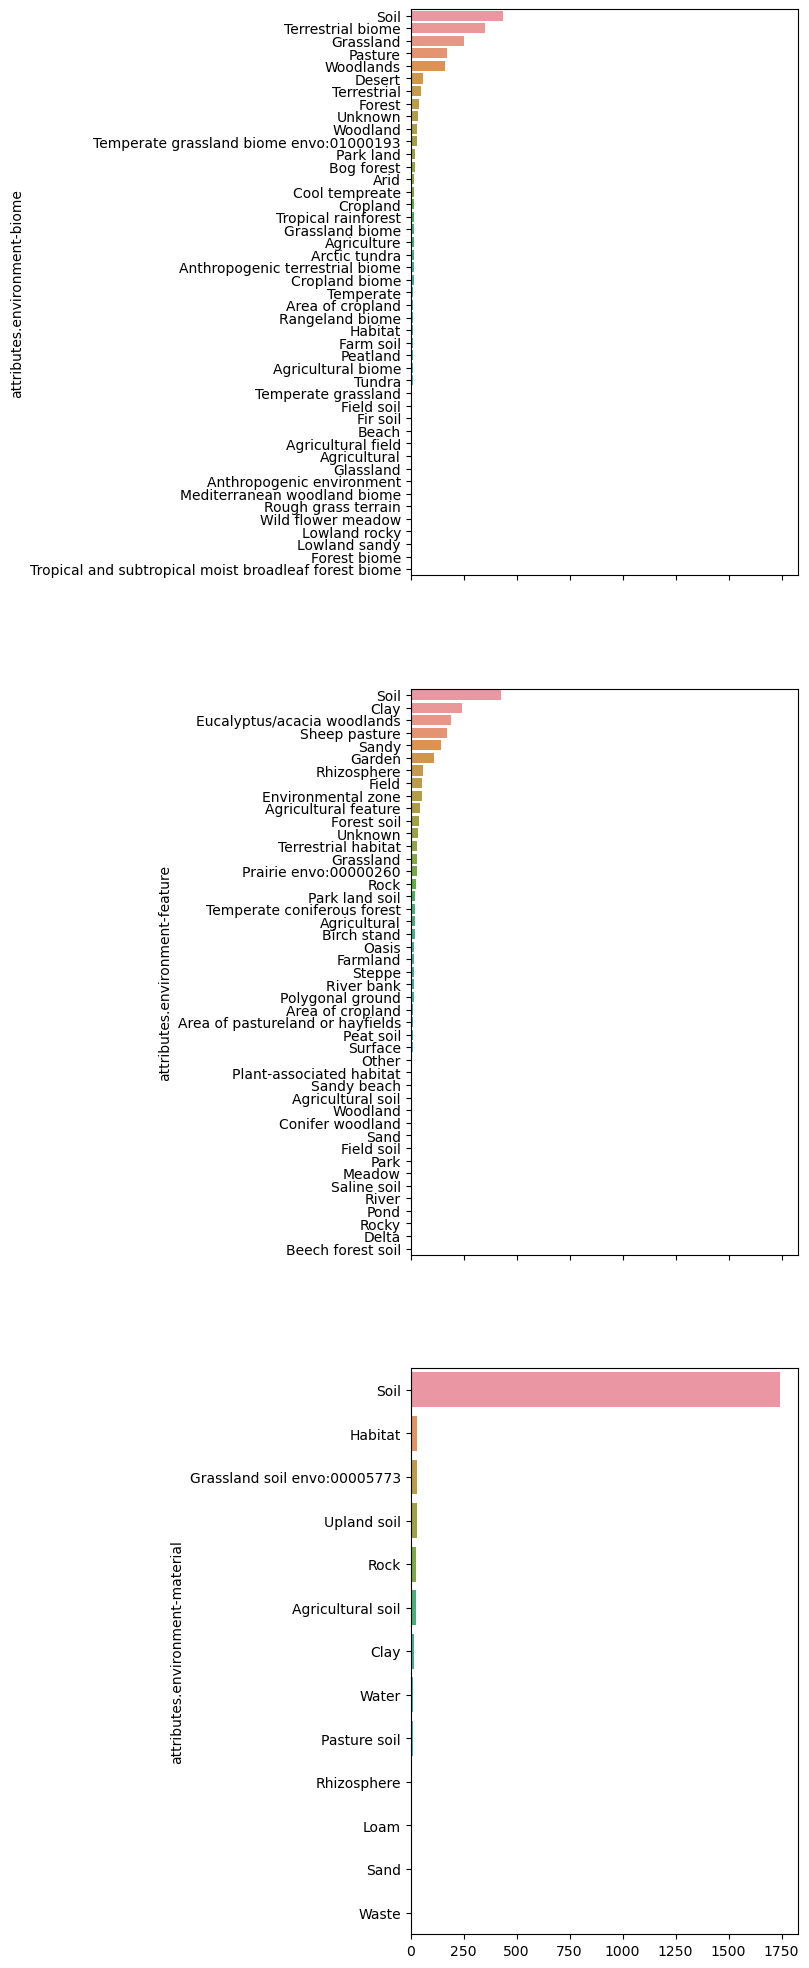

In [53]:
fig, axes = plt.subplots(figsize=(5, 25), nrows=3, sharex=True)

sns.barplot(
    y=df_mgnify["attributes.environment-biome"].str.capitalize().value_counts().index,
    x=df_mgnify["attributes.environment-biome"].str.capitalize().value_counts().values,
    ax=axes[0],
)
sns.barplot(
    y=df_mgnify["attributes.environment-feature"].str.capitalize().value_counts().index,
    x=df_mgnify["attributes.environment-feature"]
    .str.capitalize()
    .value_counts()
    .values,
    ax=axes[1],
)
sns.barplot(
    y=df_mgnify["attributes.environment-material"]
    .str.capitalize()
    .value_counts()
    .index,
    x=df_mgnify["attributes.environment-material"]
    .str.capitalize()
    .value_counts()
    .values,
    ax=axes[2],
);

How many studies do we have in total?

In [54]:
df_mgnify.shape[0] + df_img.shape[0]

10223

In [55]:
df_mgnify.shape

(2914, 36)